In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [5]:
df = pd.read_csv('C:\\Users\\david.sladkov\\Desktop\\vgsales.csv')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# **TOP GLOBAL SALES**

In [7]:

top_sales = df[['Name', 'Global_Sales']]

In [8]:
top_sales

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'Mario Kart Wii'),
  Text(3, 0, 'Wii Sports Resort'),
  Text(4, 0, 'Pokemon Red/Pokemon Blue'),
  Text(5, 0, 'Tetris'),
  Text(6, 0, 'New Super Mario Bros.'),
  Text(7, 0, 'Wii Play'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Duck Hunt')])

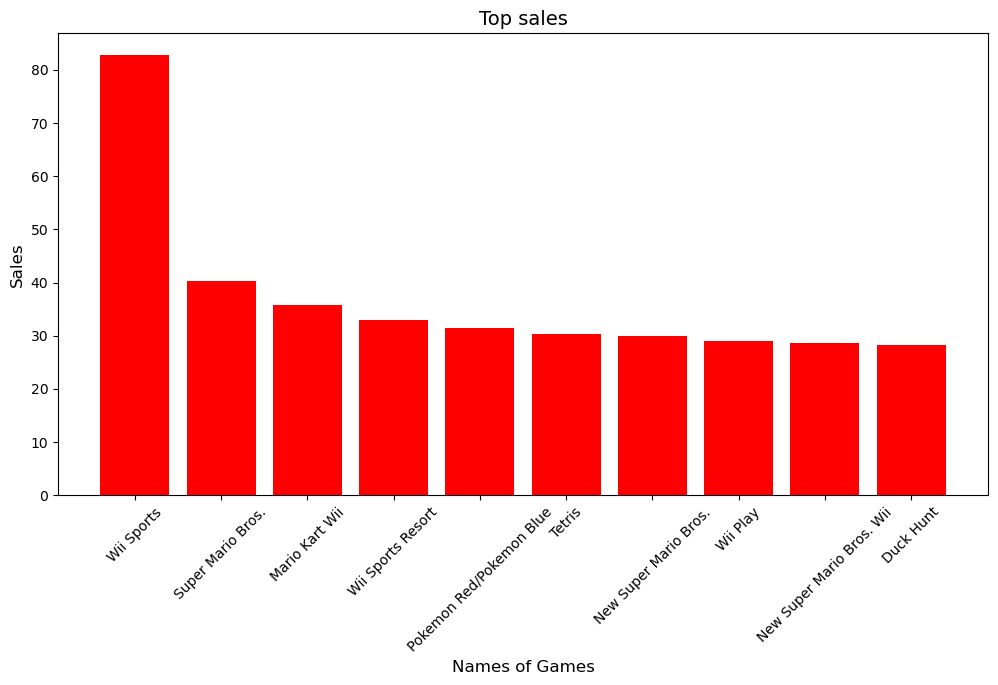

In [22]:
plt.figure(figsize = (12,6))
plt.bar(top_sales.Name.head(10),top_sales.Global_Sales.head(10),color = 'red')
plt.title("Top sales", fontsize=14)
plt.xlabel("Names of Games", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)  


# **TOP PLATFORMS SALES**

In [24]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()


In [25]:
top_platforms = platform_sales.sort_values(by='Global_Sales', ascending=False).head(10)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC')])

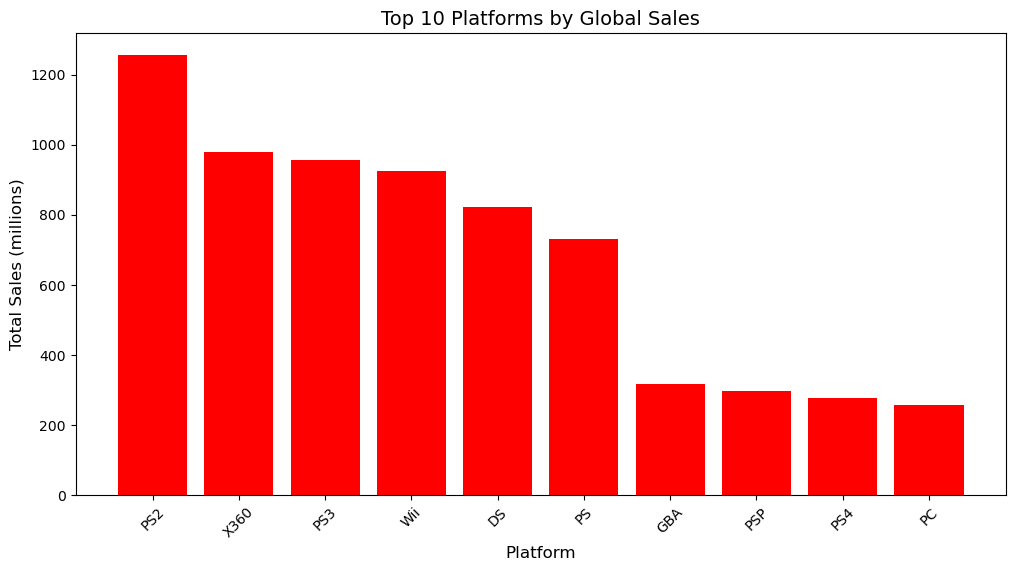

In [26]:
plt.figure(figsize=(12,6))
plt.bar(top_platforms['Platform'], top_platforms['Global_Sales'], color='red')
plt.title("Top 10 Platforms by Global Sales", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.xticks(rotation=45)

# **SALES by YEARS**

In [11]:
year_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

In [29]:
top_year = year_sales.sort_values(by = 'Global_Sales', ascending= False)

(array([1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.,
        2020., 2025.]),
 [Text(1975.0, 0, '1975'),
  Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

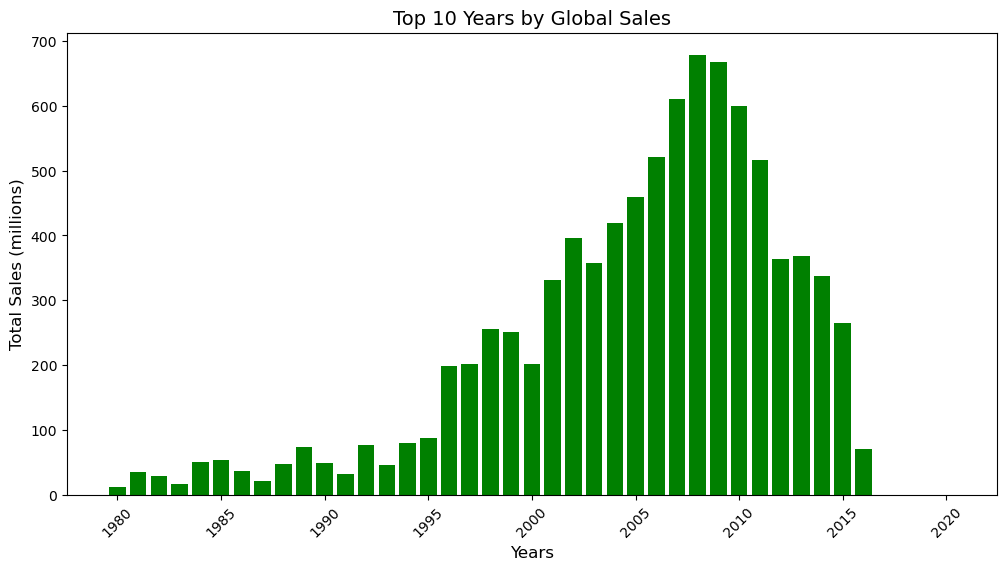

In [33]:
plt.figure(figsize=(12,6))
plt.bar(top_year['Year'], top_year['Global_Sales'], color = 'green')
plt.title("Top 10 Years by Global Sales", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Total Sales (millions)", fontsize=12)
plt.xticks(rotation=45)

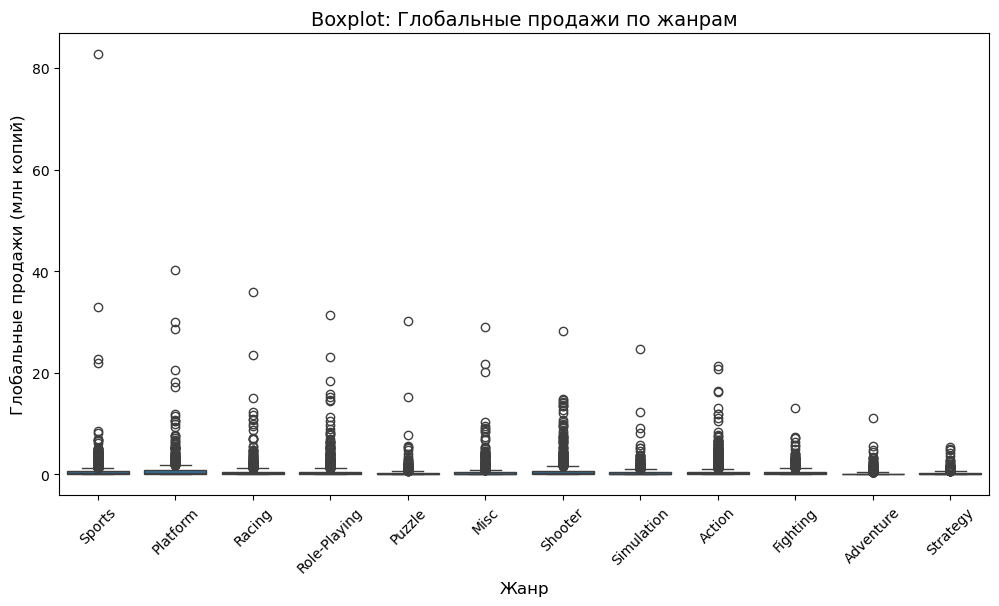

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=45)  # Поворачиваем подписи оси X
plt.title("Boxplot: Глобальные продажи по жанрам", fontsize=14)
plt.xlabel("Жанр", fontsize=12)
plt.ylabel("Глобальные продажи (млн копий)", fontsize=12)
plt.show()

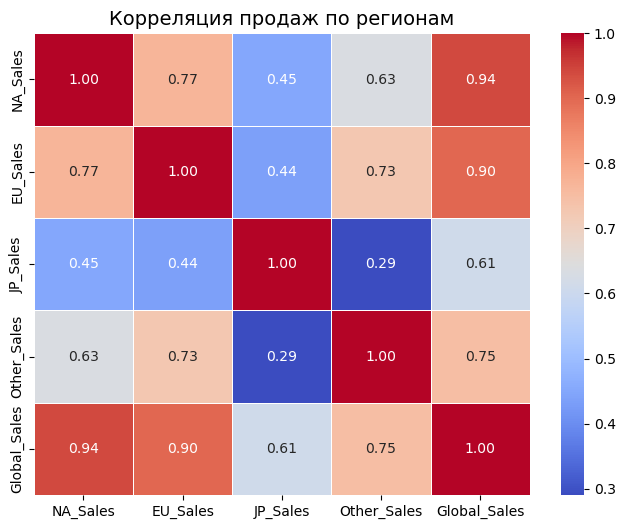

In [35]:
sales_corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляция продаж по регионам", fontsize=14)
plt.show()


In [36]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [37]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [38]:
df['Year'].fillna(df['Year'].median(), inplace=True)


In [39]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [41]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])


In [42]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [43]:

region_sales_stats = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()

# **Normalnost raspredeleniya zadac v Global_Sales**

In [8]:
ks_stat, ks_p_value = stats.kstest(df['Global_Sales'], 'norm')

In [9]:
ks_stat

0.5039893563146316

In [10]:
ks_p_value


0.0

In [12]:
dagostino_stat, dagostino_p_value = stats.normaltest(df['Global_Sales'].dropna())


In [13]:
dagostino_stat, dagostino_p_value

(34435.72520793447, 0.0)

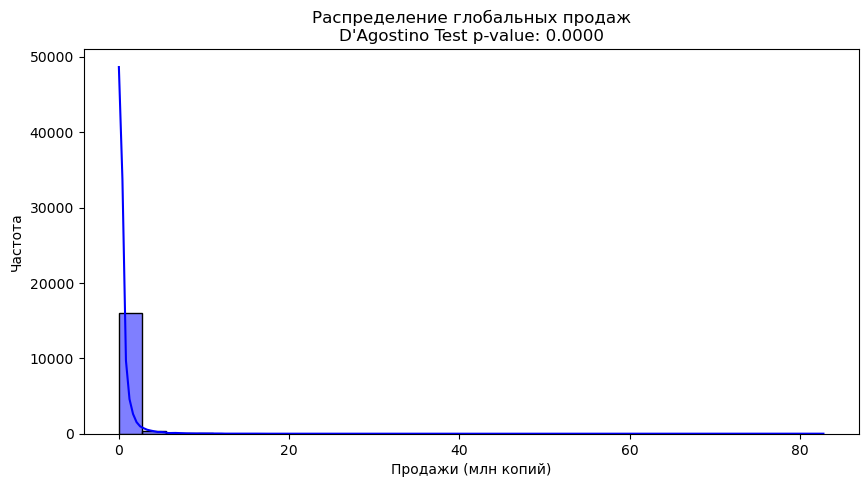

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Global_Sales'], bins=30, kde=True, color="blue")
plt.title(f"Распределение глобальных продаж\nD'Agostino Test p-value: {dagostino_p_value:.4f}")
plt.xlabel("Продажи (млн копий)")
plt.ylabel("Частота")
plt.show()


In [15]:
df['Log_Global_Sales'] = np.log1p(df['Global_Sales'])

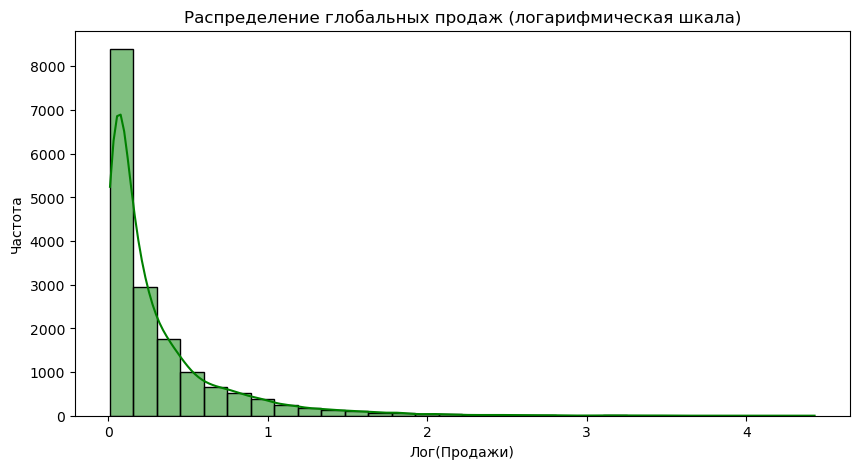

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['Log_Global_Sales'], bins=30, kde=True, color="green")
plt.title("Распределение глобальных продаж (логарифмическая шкала)")
plt.xlabel("Лог(Продажи)")
plt.ylabel("Частота")
plt.show()

In [17]:
dagostino_p_value

0.0

In [18]:
pearson_corr = df[['Year', 'Global_Sales']].corr(method='pearson').iloc[0,1]

spearman_corr = df[['Year', 'Global_Sales']].corr(method='spearman').iloc[0,1]

In [19]:
pearson_corr

-0.0747347976158614

In [20]:
spearman_corr

-0.15124824098420708

# **T-TEST**

In [21]:
shooter_sales = df[df['Genre'] == 'Shooter']['Global_Sales']
action_sales = df[df['Genre'] == 'Action']['Global_Sales']

In [22]:
t_stat, p_value = stats.ttest_ind(shooter_sales, action_sales, equal_var=False, nan_policy='omit')

In [23]:
p_value

1.16908450171541e-06

In [24]:
ps_sales = df[df['Platform'].str.contains('PS', na=False)]['Global_Sales']
xbox_sales = df[df['Platform'].str.contains('X', na=False)]['Global_Sales']

In [25]:
t_stat, p_value = stats.ttest_ind(ps_sales, xbox_sales, equal_var=False, nan_policy='omit')


In [26]:
p_value

0.04668200835601448